In [11]:
import matplotlib.pyplot as plt

In [12]:
names = ["Baseline", "SPQ", "QAT", "L1 Pruning 50%", "L1 Pruning 60%", "L1 Pruning 70%", "L1 Pruning 80%", "L1 Pruning 90%", "OpNorm Pruning 50%", "OpNorm Pruning 60%", "OpNorm Pruning 70%", "OpNorm Pruning 80%", "OpNorm Pruning 90%", "COMB"]
model_sizes = [14.85, 4.48, 4.48, 7.55, 6.60, 5.82, 5.17, 4.75, 7.55,6.60, 5.82, 5.17, 4.75, 1.68]  # Example model sizes
lwlrap_values = [0.74, 0.73, 0.756, 0.695, 0.665, 0.662, 0.654, 0.552, 0.675, 0.665, 0.661, 0.649, 0.494, 0.66]  # Example LWLRAP values
symbols = ['o', '^', 's', 'd', 'd', 'd', 'd', 'd', 'p', 'p', 'p', 'p', 'p', "*"]  # Symbols for each model

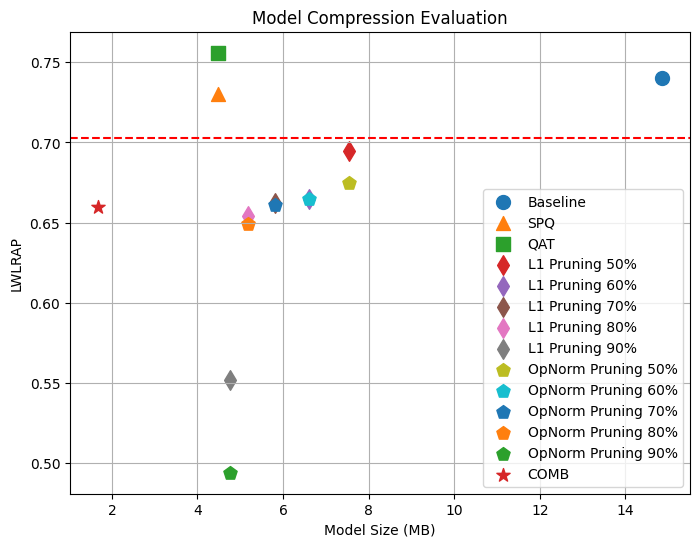

In [21]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot each model's data point with a different symbol
for i, (name, size, lwlrap, symbol) in enumerate(zip(names, model_sizes, lwlrap_values, symbols)):
    plt.scatter(size, lwlrap, marker=symbol, label=name, s=100)

# Add a red dotted line indicating a 5% performance drop from baseline
plt.axhline(y=0.703, color='red', linestyle='--')

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Compression Evaluation')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot


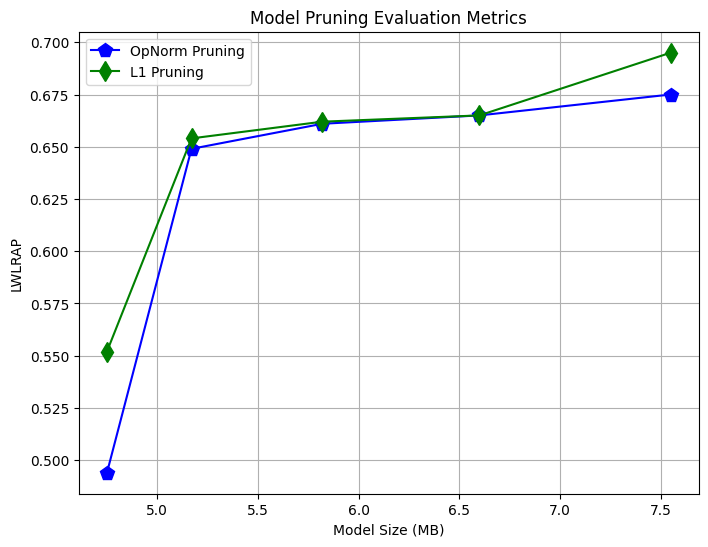

In [18]:
# Filter L1 pruning and OpNorm pruning
l1_pruning_sizes = [size for size, name in zip(model_sizes, names) if "L1 Pruning" in name]
l1_pruning_values = [value for value, name in zip(lwlrap_values, names) if "L1 Pruning" in name]
opnorm_pruning_sizes = [size for size, name in zip(model_sizes, names) if "OpNorm Pruning" in name]
opnorm_pruning_values = [value for value, name in zip(lwlrap_values, names) if "OpNorm Pruning" in name]

# Plot the graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot OpNorm pruning models
plt.plot(opnorm_pruning_sizes, opnorm_pruning_values, marker='p', label='OpNorm Pruning', linestyle='-', color='blue', markersize=10)

# Plot L1 pruning models and connect them with lines
plt.plot(l1_pruning_sizes, l1_pruning_values, marker='d', label='L1 Pruning', linestyle='-', color='green', markersize=10)

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Pruning Evaluation Metrics')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot

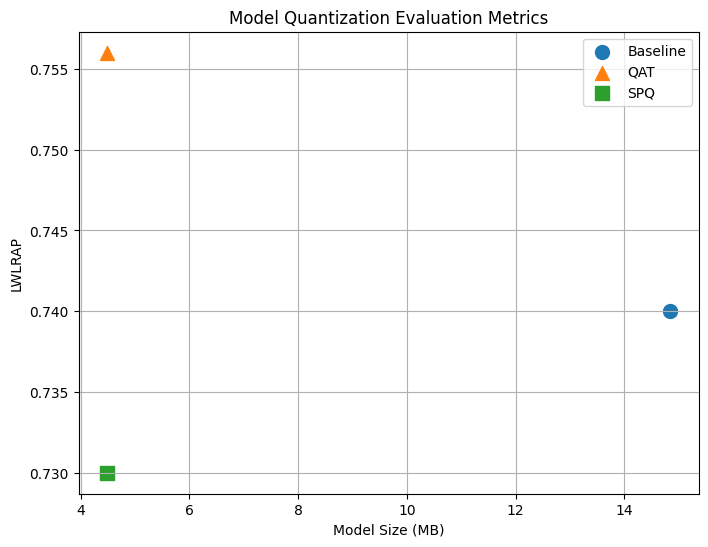

In [20]:
# Filter baseline, QAT, and SPQ
baseline_sizes = [size for size, name in zip(model_sizes, names) if name == "Baseline"]
baseline_values = [value for value, name in zip(lwlrap_values, names) if name == "Baseline"]
qat_sizes = [size for size, name in zip(model_sizes, names) if name == "QAT"]
qat_values = [value for value, name in zip(lwlrap_values, names) if name == "QAT"]
spq_sizes = [size for size, name in zip(model_sizes, names) if name == "SPQ"]
spq_values = [value for value, name in zip(lwlrap_values, names) if name == "SPQ"]

# Plot the graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot Baseline, QAT, and SPQ
plt.scatter(baseline_sizes, baseline_values, marker='o', label='Baseline', s=100)
plt.scatter(qat_sizes, qat_values, marker='^', label='QAT', s=100)
plt.scatter(spq_sizes, spq_values, marker='s', label='SPQ', s=100)

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Quantization Evaluation Metrics')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot